In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense,LSTM,Dropout

In [2]:
df = pd.read_csv("/content/GoogleStock Price.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

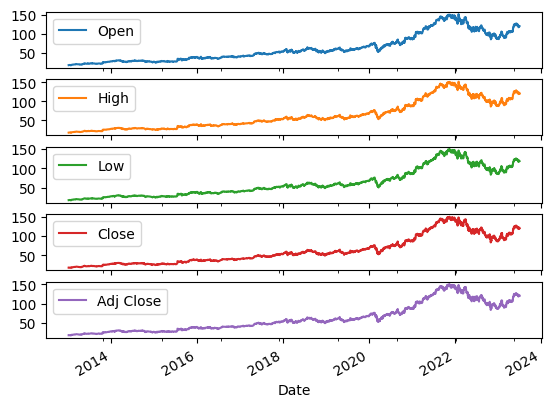

In [4]:
df.set_index('Date')[['Open','High','Low','Close',"Adj Close"]].plot(subplots = True)

In [5]:
df_input = df.drop(["Volume",'Date'],axis = 1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
data_scaled = scaler.fit_transform(df_input)

In [8]:
features = data_scaled
target = data_scaled[:,1]

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(features,target,test_size = 0.2,shuffle  =False)   # shuffle = Flase is important because it is a time series data and order is important

In [10]:
from keras.preprocessing.sequence import TimeseriesGenerator
win_length = 14
batch_size = 32
num_features = 5
train_generator = TimeseriesGenerator(x_train,y_train,length= win_length,sampling_rate = 1,batch_size = batch_size)
test_generator = TimeseriesGenerator(x_test,y_test,length= win_length,sampling_rate = 1,batch_size = batch_size)


In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(128,input_shape = (win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.GRU(64,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.GRU(32,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.GRU(16,return_sequences=True))
model.add(tf.keras.layers.Dense(1))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 14, 128)           51840     
                                                                 
 gru_1 (GRU)                 (None, 14, 64)            37248     
                                                                 
 dropout (Dropout)           (None, 14, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 14, 32)            9408      
                                                                 
 dropout_1 (Dropout)         (None, 14, 32)            0         
                                                                 
 gru_3 (GRU)                 (None, 14, 16)            2400      
                                                                 
 dense (Dense)               (None, 14, 1)             1

In [13]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(loss = tf.losses.MeanSquaredError(),optimizer = tf.optimizers.Adam(),metrics= [tf.metrics.MeanAbsoluteError()])


In [14]:
history = model.fit_generator(train_generator,epochs = 50,validation_data = test_generator,shuffle = False,callbacks = [early_stopping])

Epoch 1/50


<ipython-input-14-1ce2586a68b7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs = 50,validation_data = test_generator,shuffle = False,callbacks = [early_stopping])


66/66 [==============================] - 18s 141ms/step - loss: 0.0038 - mean_absolute_error: 0.0405 - val_loss: 0.0284 - val_mean_absolute_error: 0.1254
Epoch 2/50
66/66 [==============================] - 3s 42ms/step - loss: 0.0169 - mean_absolute_error: 0.0830 - val_loss: 0.0382 - val_mean_absolute_error: 0.1339
Epoch 3/50
66/66 [==============================] - 3s 49ms/step - loss: 0.0118 - mean_absolute_error: 0.0703 - val_loss: 0.0255 - val_mean_absolute_error: 0.1181
Epoch 4/50
66/66 [==============================] - 3s 42ms/step - loss: 0.0077 - mean_absolute_error: 0.0566 - val_loss: 0.0101 - val_mean_absolute_error: 0.0750
Epoch 5/50
66/66 [==============================] - 3s 43ms/step - loss: 0.0037 - mean_absolute_error: 0.0465 - val_loss: 0.0045 - val_mean_absolute_error: 0.0535
Epoch 6/50
66/66 [==============================] - 4s 59ms/step - loss: 0.0015 - mean_absolute_error: 0.0290 - val_loss: 0.0031 - val_mean_absolute_error: 0.0438
Epoch 7/50
66/66 [=============

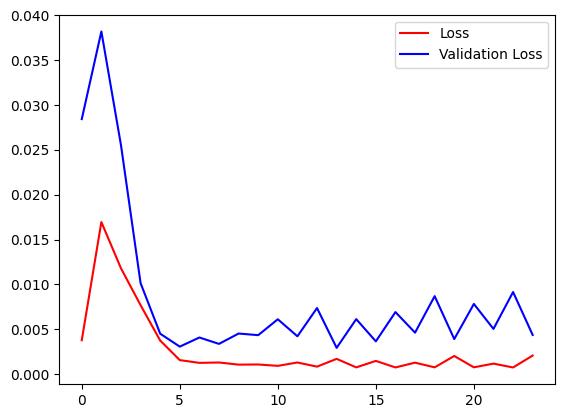

In [15]:
plt.plot(history.history['loss'],color = 'r',label = "Loss")
plt.plot(history.history['val_loss'],color = 'b',label = "Validation Loss")
plt.legend()
plt.show()

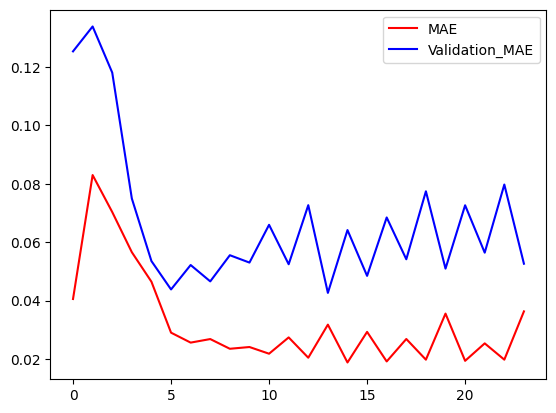

In [16]:
plt.plot(history.history['mean_absolute_error'],color = 'r',label = "MAE")
plt.plot(history.history['val_mean_absolute_error'],color = 'b',label = "Validation_MAE")
plt.legend()
plt.show()